In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA


In [19]:
X=np.array([[-1, -1], [-2,-1],[-3,-2],[1,1],[2,1],[3,2]])


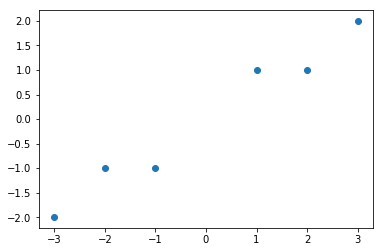

In [11]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [20]:
pca=PCA(n_components=2)

In [13]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [14]:
#principal component vectors
print(pca.components_)

[[-0.83849224 -0.54491354]
 [ 0.54491354 -0.83849224]]


In [15]:
print(pca.explained_variance_)

[7.93954312 0.06045688]


In [16]:
print(pca.explained_variance_ratio_)

[0.99244289 0.00755711]


In [17]:
print(pca.singular_values_) #singular value decomposition

[6.30061232 0.54980396]


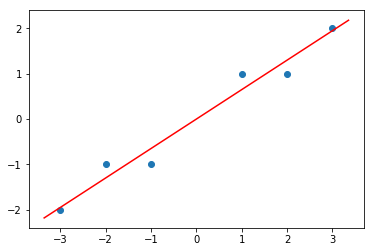

In [19]:
tval=np.linspace(-4,4,101)
xval=tval*pca.components_[0,0]
yval=tval*pca.components_[0,1]

plt.plot(xval,yval,color='red')
plt.scatter(X[:,0],X[:,1])
plt.show()

In [21]:
#convert the data (change of basis)
X_r= pca.fit(X).transform(X)

In [22]:
print(X_r)
print(X)
print(pca.components_.T)
print(np.matmul(X*pca.components_.T)) #왜 안될까..... / 1차 구글링 해결x

[[ 1.38340578  0.2935787 ]
 [ 2.22189802 -0.25133484]
 [ 3.6053038   0.04224385]
 [-1.38340578 -0.2935787 ]
 [-2.22189802  0.25133484]
 [-3.6053038  -0.04224385]]
[[-1 -1]
 [-2 -1]
 [-3 -2]
 [ 1  1]
 [ 2  1]
 [ 3  2]]
[[-0.83849224  0.54491354]
 [-0.54491354 -0.83849224]]


ValueError: operands could not be broadcast together with shapes (6,2) (2,2) 

### IRIS Data

In [2]:
from sklearn.datasets import load_iris

#help(load_iris)

In [6]:
iris=load_iris()
#print(iris)
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [7]:
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [24]:
X=iris.data
y=iris.target
target_names=iris.target_names

Text(0.5,1,'IRIS dataset')

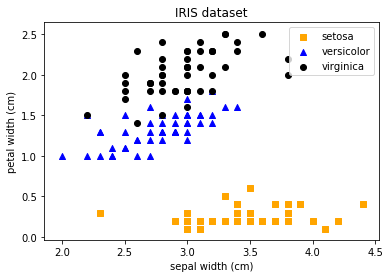

In [25]:
color=['orange','blue','black']
markers=['s','^','o']

ax1=1
ax2=3
for col,mak,i,tname in zip (color,markers,[0,1,2],target_names):
    plt.scatter(X[y==i,ax1],X[y==i,ax2],color=col,marker=mak,label=tname)
    
plt.legend(loc='best',shadow=False, scatterpoints=1)
plt.xlabel(iris.feature_names[ax1])
plt.ylabel(iris.feature_names[ax2])
plt.title('IRIS dataset')


In [26]:
pca=PCA(n_components=4) #number of components
pca.fit(X)

print(X_r)

[[ 1.38340578  0.2935787 ]
 [ 2.22189802 -0.25133484]
 [ 3.6053038   0.04224385]
 [-1.38340578 -0.2935787 ]
 [-2.22189802  0.25133484]
 [-3.6053038  -0.04224385]]


In [32]:
print(pca.components_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]]
[4.22484077 0.24224357 0.07852391 0.02368303]
[0.92461621 0.05301557 0.01718514 0.00518309]


In [33]:
print(pca.mean_)

[5.84333333 3.054      3.75866667 1.19866667]


In [37]:
X_r=pca.fit(X).transform(X)
print(X_r[0:5])

[[-2.68420713e+00  3.26607315e-01 -2.15118370e-02  1.00615724e-03]
 [-2.71539062e+00 -1.69556848e-01 -2.03521425e-01  9.96024240e-02]
 [-2.88981954e+00 -1.37345610e-01  2.47092410e-02  1.93045428e-02]
 [-2.74643720e+00 -3.11124316e-01  3.76719753e-02 -7.59552741e-02]
 [-2.72859298e+00  3.33924564e-01  9.62296998e-02 -6.31287327e-02]]


Text(0.5,1,'PCA of IRIS dataset')

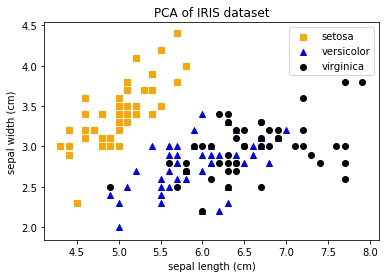

In [38]:
color=['orange','blue','black']
markers=['s','^','o']

for col,mak,i,tname in zip (color,markers,[0,1,2],target_names):
    plt.scatter(X[y==i,0],X[y==i,1],color=col,marker=mak,label=tname) #첫번째와 두번째 주성분으로만
    
plt.legend(loc='best',shadow=False, scatterpoints=1)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('PCA of IRIS dataset')

### Preprocessing before PCA ( if needed)

In [40]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler() #normalize

In [43]:
X_scaled = scaler.fit(X).transform(X)

In [44]:
print(np.mean(X_scaled, axis=0))
print(np.var(X_scaled, axis=0))

[-1.69031455e-15 -1.63702385e-15 -1.48251781e-15 -1.62314606e-15]
[1. 1. 1. 1.]
